# HOSPITAL RATING CLASSIFICATION

Welcome to the Starter Code for the Hospital Rating Classification Capstone Project!

In this notebook you'll find 
- A blueprint on how to attempt the course project.
- Additional hints and directions on different tasks

Please note that this approach is one of the many approaches you can take for solving this Capstone project.

### Import the necessary libraries

In [42]:
import pandas as pd, numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from pandas.core.common import random_state

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.linear_model import Lasso, LassoCV, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree

In [43]:
import warnings
warnings.filterwarnings("ignore")

### Task 1 

Task 1: Understand the data

 

Take some time to familiarize yourself with the data. What are the key variables?

Specifically, answer the following questions:

- 1.1 - Perform a few basic data quality checks to understand the different columns and prepare descriptive statistics for some of the important columns.
- 1.2 - What is the distribution of hospital overall ratings? How are they varying across other parameters like `State`? Create  a few visualizations that provide some insights into the data.

##### Task 1.1

In [44]:
df = pd.read_csv(r"C:\Users\adity\Downloads\DataSets\DataSets\hospital-info.csv")
df

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Ownership,Emergency Services,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Government,Yes,...,-1.87000,-0.000000,-0.422000,-0.787,-6.400000,-0.900000,-7.100000,-2.400000,-38.100000,-6.900000
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Government,Yes,...,-0.38600,-0.871177,-1.388000,-0.405,-13.300000,-10.200000,-5.300000,-4.000000,-42.800000,-5.100000
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Government,Yes,...,-0.31000,-0.871177,-1.261000,-0.513,-11.800000,-4.600000,-0.000000,-4.600000,-45.600000,-9.100000
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Voluntary,Yes,...,-0.96398,-0.871177,-0.987212,-0.000,-24.300000,-6.100000,-4.716942,-2.964405,-39.964766,-20.700000
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Others,Yes,...,-0.96398,-0.871177,-0.987212,-0.585,-3.600000,-2.936245,-4.716942,-0.600000,-39.964766,-8.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3052,670085,TEXAS HEALTH HARRIS METHODIST HOSPITAL ALLIANCE,10864 TEXAS HEALTH TRAIL,FORT WORTH,TX,76244,TARRANT,6822122000,Voluntary,Yes,...,-2.97300,-0.871177,-0.987212,-1.557,-0.600000,-2.936245,-4.716942,-7.200000,-39.964766,-10.800000
3053,670088,BAYLOR SCOTT & WHITE MEDICAL CENTER- COLLEGE S...,700 SCOTT & WHITE DRIVE,COLLEGE STATION,TX,77845,BRAZOS,9796913701,Voluntary,Yes,...,-0.96900,-0.871177,-0.987212,-0.506,-6.100000,-0.000000,-3.300000,-2.964405,-35.600000,-6.200000
3054,670092,WALNUT HILL MEDICAL CENTER,7502 GREENVILLE AVENUE,DALLAS,TX,75231,DALLAS,9728636000,Others,Yes,...,-0.96398,-0.871177,-0.987212,-0.399,-10.700000,-4.600000,-4.716942,-2.964405,-39.964766,-9.144957
3055,670096,"BAY AREA REGIONAL MEDICAL CENTER, LLC",200 BLOSSOM STREET,WEBSTER,TX,77598,HARRIS,2815257000,Others,Yes,...,-0.96398,-0.871177,-0.987212,-0.243,-8.692897,-2.936245,-4.716942,-2.964405,-39.964766,-9.144957


In [45]:
##Check the data type of the different columns
## Hint - You can use the .info() method here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 94 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Provider ID                                           3057 non-null   int64  
 1   Hospital Name                                         3057 non-null   object 
 2   Address                                               3057 non-null   object 
 3   City                                                  3057 non-null   object 
 4   State                                                 3057 non-null   object 
 5   ZIP Code                                              3057 non-null   int64  
 6   County Name                                           3057 non-null   object 
 7   Phone Number                                          3057 non-null   int64  
 8   Hospital Ownership                                    3057

In [46]:
# Check for missing values
print(df.isnull().sum())

Provider ID        0
Hospital Name      0
Address            0
City               0
State              0
                  ..
MED_OP_11_Score    0
MED_OP_13_Score    0
MED_OP_14_Score    0
MED_OP_8_Score     0
MED_OP_9_Score     0
Length: 94, dtype: int64


Note down your observations after completing the above task. You should ask questions such as:

- Check for non-null columns. Do you see any column having missing values?
- Are the datatypes correct for all the variables? You might have to convert a few of them to categorical later

##### Task 1.2

In [47]:
## Descriptive Statistics
## Let's take the main measures and the hospital overall rating first.
features = ['Mortality national comparison', 'Safety of care national comparison',
            'Readmission national comparison', 'Patient experience national comparison',
            'Effectiveness of care national comparison', 'Timeliness of care national comparison',
            'Efficient use of medical imaging national comparison']

In [48]:
### Filter out the above columns from the DataFrame and compute the descriptive statistics
### Hint - The .describe() method might be useful
df[features].describe()

,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison
count,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000
mean,1.018973,1.042852,0.981681,0.937848,1.192673,0.976447,1.006215
std,0.492383,0.693884,0.731887,0.799253,0.647062,0.750720,0.478217
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


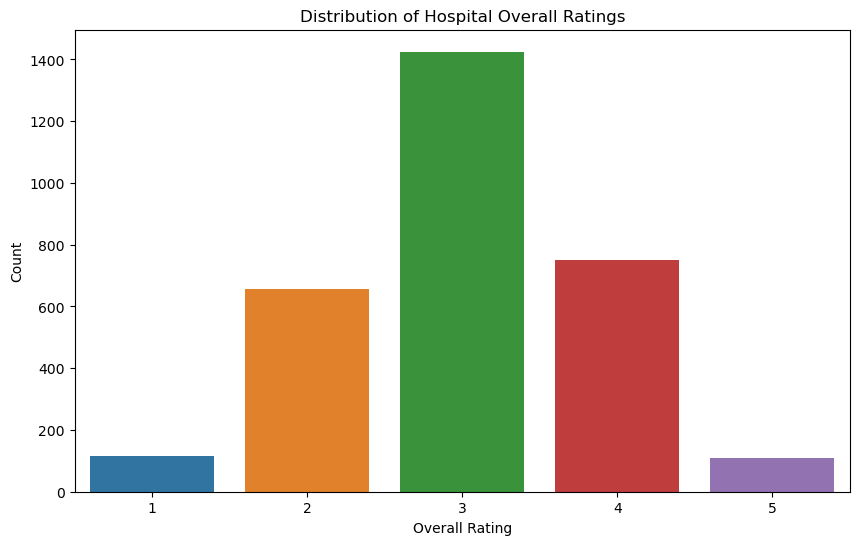

In [49]:
### Analyze your target variable - "Hospital overall rating"
### How does the ratings distribution look like for all the hospitals?

## Hint - You can use seaborn plots like countplot() for checking distribution of the ratings
## Hint - You can plot a correlation heatmap to check the correlation between the main measures stored in "features"
## Hint - You can also check the correlations between the "Hospital overall rating" and other measures
# Analyze the distribution of hospital overall ratings

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Hospital overall rating')
plt.title('Distribution of Hospital Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()


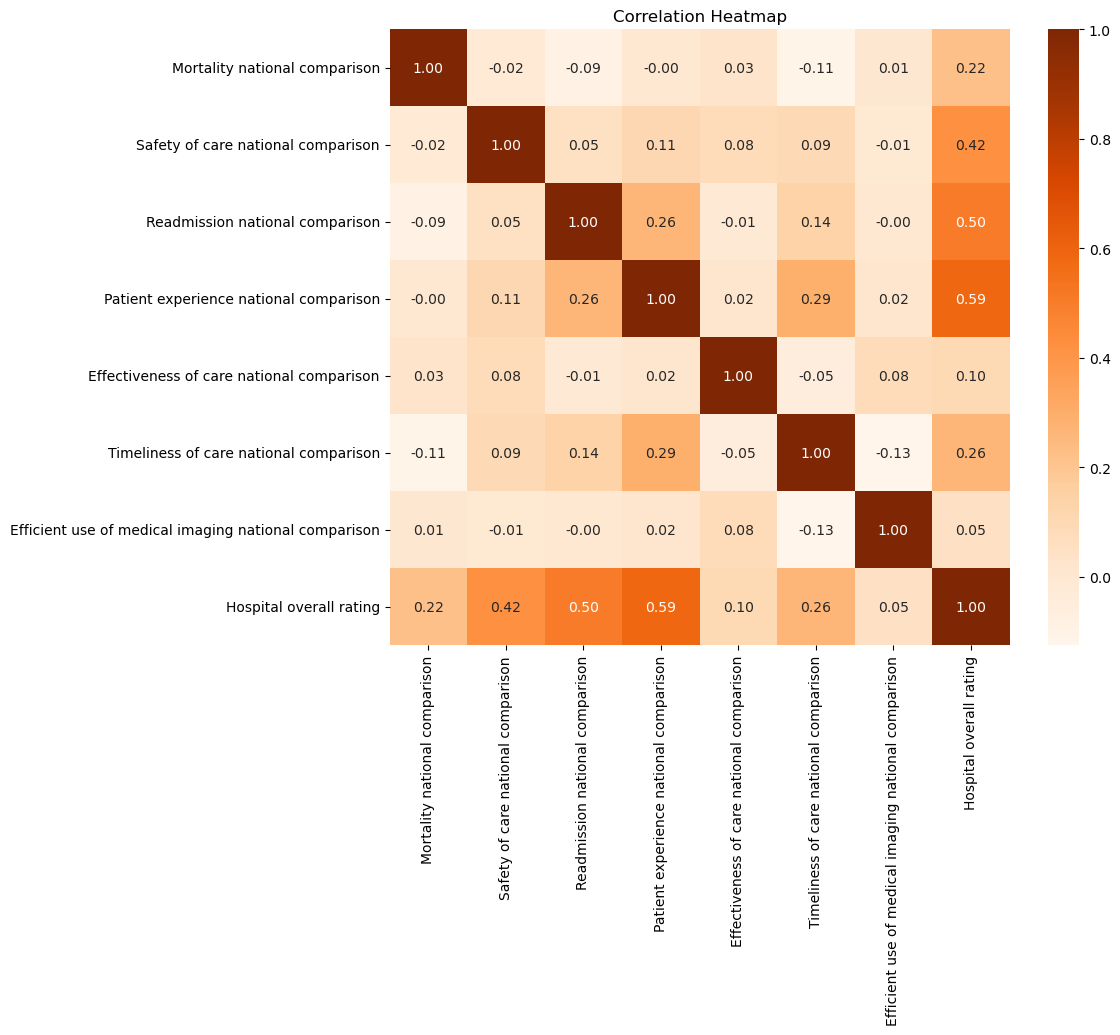

In [50]:
# Check correlations between main measures and hospital overall rating
plt.figure(figsize=(10, 8))
sns.heatmap(df[features + ['Hospital overall rating']].corr(), annot=True, cmap='Oranges', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


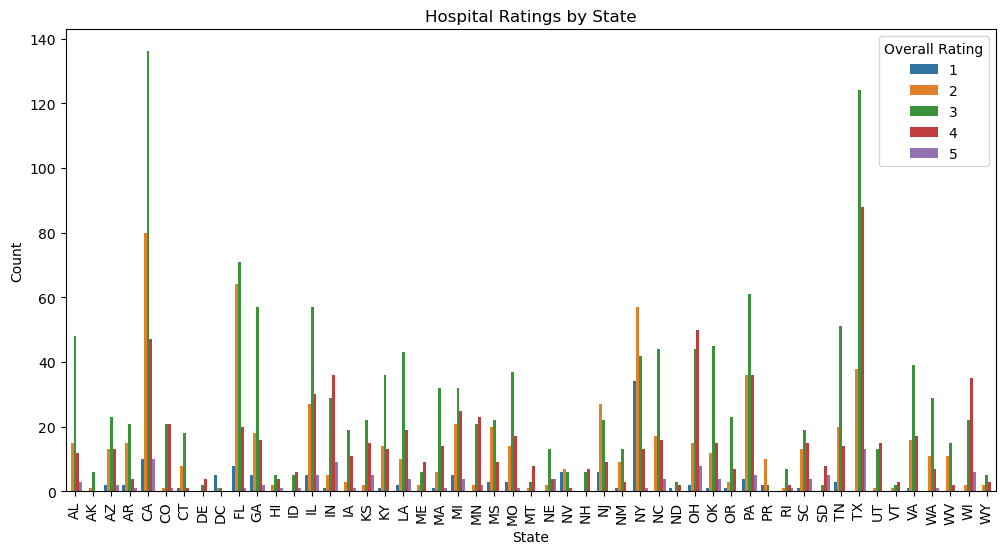

In [51]:
# Check how hospital ratings vary across other parameters like State
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='State', hue='Hospital overall rating')
plt.title('Hospital Ratings by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Overall Rating')
plt.show()


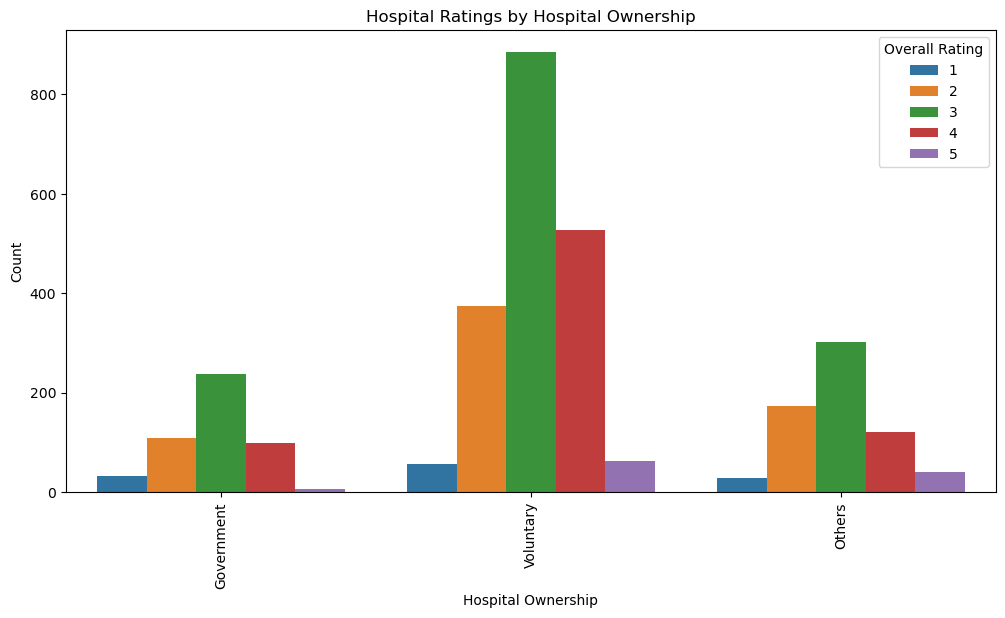

In [52]:
### Hint - Some example parameters are "State" and "Hospital Ownership"
### Check how the hospital ratings vary across other parameters


plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Hospital Ownership', hue='Hospital overall rating')
plt.title('Hospital Ratings by Hospital Ownership')
plt.xlabel('Hospital Ownership')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Overall Rating')
plt.show()

In [53]:
### Hint - You can use the pivot_table functionality of pandas to perform this
pivot_table_ratings = pd.pivot_table(df, values='Hospital overall rating', index='State',columns='Hospital Ownership',aggfunc='count')
print("Hospital Ratings Variation Across States and Hospital Ownership:")
pivot_table_ratings

Hospital Ratings Variation Across States and Hospital Ownership:


Hospital Ownership,Government,Others,Voluntary
State,,,
AK,2.0,2.0,3.0
AL,35.0,23.0,20.0
AR,3.0,14.0,26.0
AZ,6.0,16.0,31.0
CA,44.0,70.0,169.0
CO,5.0,5.0,34.0
CT,1.0,1.0,26.0
DC,NaN,2.0,5.0
DE,NaN,NaN,6.0



Note down your observations after completing the above task. You should ask questions such as:

- How are ratings distributed? the Are you seeing any peculiar distributions for the ratings?
- How do the correlations between the measures and the target variable look like?
- How do ratings vary across the different levels of the parameter that you have taken?

Rating most of the hospital is 3 and very few hospitals have 1 or  5 ratings.

The rating _group has strong positive correlation with the overall hospital rating.

We can conclude that among all three hospital ownership voluntary has highest ratings compared to government and others.

### Task 2 - Building machine learning models

Use your knowledge of classification models to create three models that predict hospital ratings. You should follow these steps:

- Prepare the data for the machine learning model 
   - Remove all the demographic columns as well as any other uneccessary features from the data set
   - For simplification, instead of having 5 ratings, we will convert them to 0 and 1. Here 0 indicates that the hospital has been rated 3 or below and 1 indicates that the hospital has been rated as 4 or 5.  Encode the Hospital columns as follows
            1,2,3 : 0
            4,5: 1
   - Store the predictors and the target variable in variables X and y.
   - Create the dummy variables for categorical columns.
   - Split the data into train and test sets (70-30 split with random state 0. This random state is recommended, though you can use any other random state of your choice).
   - Scale the numerical columns using StandardScaler.
- Build 3 classification models on your dataset. Carefully apply regularization and hyperparameter tuning techniques to improve your model performance for each of the models.
- Summarize the classification performance in terms of the necessary metrics such as accuracy, sensitivity, specificity, etc.

#####  Prepare the data for machine learning model

In [54]:
## Drop all the demographic features
demo_features = ['Provider ID','Hospital Name',
 'Address',
 'City',
 'State',
 'ZIP Code',
 'County Name',
 'Phone Number']

In [55]:
## Drop all the above features from the DataFrame df and store the rest of the features in df2
df2 = df.drop(columns=demo_features)

In [56]:
### Check the first 5 rows of df2 to see if the drop operation has worked correctly or not
df2.head(5)

,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,Government,Yes,3,1,2,1,0,1,1,1,...,-1.87000,-0.000000,-0.422000,-0.787,-6.4,-0.900000,-7.100000,-2.400000,-38.100000,-6.9
1,Government,Yes,3,0,1,2,1,1,2,0,...,-0.38600,-0.871177,-1.388000,-0.405,-13.3,-10.200000,-5.300000,-4.000000,-42.800000,-5.1
2,Government,Yes,2,0,1,1,0,1,2,1,...,-0.31000,-0.871177,-1.261000,-0.513,-11.8,-4.600000,-0.000000,-4.600000,-45.600000,-9.1
3,Voluntary,Yes,3,1,1,0,1,1,2,1,...,-0.96398,-0.871177,-0.987212,-0.000,-24.3,-6.100000,-4.716942,-2.964405,-39.964766,-20.7
4,Others,Yes,3,1,1,1,1,1,2,1,...,-0.96398,-0.871177,-0.987212,-0.585,-3.6,-2.936245,-4.716942,-0.600000,-39.964766,-8.2


In [57]:
##Recheck the columns to see if anything else needs to be dropped
## There might be other unnecessary columns that require dropping
df2.drop(columns = ['rating_group'], inplace = True)
df2

,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,Government,Yes,3,1,2,1,0,1,1,1,...,-1.87000,-0.000000,-0.422000,-0.787,-6.400000,-0.900000,-7.100000,-2.400000,-38.100000,-6.900000
1,Government,Yes,3,0,1,2,1,1,2,0,...,-0.38600,-0.871177,-1.388000,-0.405,-13.300000,-10.200000,-5.300000,-4.000000,-42.800000,-5.100000
2,Government,Yes,2,0,1,1,0,1,2,1,...,-0.31000,-0.871177,-1.261000,-0.513,-11.800000,-4.600000,-0.000000,-4.600000,-45.600000,-9.100000
3,Voluntary,Yes,3,1,1,0,1,1,2,1,...,-0.96398,-0.871177,-0.987212,-0.000,-24.300000,-6.100000,-4.716942,-2.964405,-39.964766,-20.700000
4,Others,Yes,3,1,1,1,1,1,2,1,...,-0.96398,-0.871177,-0.987212,-0.585,-3.600000,-2.936245,-4.716942,-0.600000,-39.964766,-8.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3052,Voluntary,Yes,4,1,1,1,1,2,1,1,...,-2.97300,-0.871177,-0.987212,-1.557,-0.600000,-2.936245,-4.716942,-7.200000,-39.964766,-10.800000
3053,Voluntary,Yes,3,1,1,1,2,1,2,1,...,-0.96900,-0.871177,-0.987212,-0.506,-6.100000,-0.000000,-3.300000,-2.964405,-35.600000,-6.200000
3054,Others,Yes,3,1,1,1,0,0,2,1,...,-0.96398,-0.871177,-0.987212,-0.399,-10.700000,-4.600000,-4.716942,-2.964405,-39.964766,-9.144957
3055,Others,Yes,3,1,1,2,0,0,1,1,...,-0.96398,-0.871177,-0.987212,-0.243,-8.692897,-2.936245,-4.716942,-2.964405,-39.964766,-9.144957


##### Map the ratings 

- 1,2,3 will be 0
- 4,5 will be 1

In [58]:
## Hint -  Write a simple lambda function to do the mapping
## Refer to this link from Course 1 for more help -  https://learn.upgrad.com/course/2897/segment/16179/128948/394776/2054363
df2['Hospital overall rating'] = df2['Hospital overall rating'].apply(lambda x: 0 if x in [1, 2, 3] else 1)

##### Convert the datatypes of the categorical variables

In [59]:
### In task 1, you would have identified the categorical variables, which may or may not be in their correct data types
### Now is the right time to convert them to the correct datatype 
### This will be useful when you create dummy variables next
df2['Hospital Ownership'] = df2['Hospital Ownership'].astype('category')

##### Data Preparation and Train-test split

In [60]:
### Create X and y variable
X = df2.drop(columns=['Hospital overall rating'])
y = df2['Hospital overall rating']

In [61]:
### Create the dummy variables for categorical variables
### Note - Make sure the "drop_first parameter" is correctly initialized for different ML models
### Hint - You can create multiple versions of the X dataset
X = pd.get_dummies(X, drop_first=True)

In [62]:
## Perform the train_test split to create the train and validation sets
## Choose any random state of your choice 
## Split it in the ratio of 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [63]:
# Scale and Standardize the numerical variables
scaler = StandardScaler()
numeric_cols = [col for col in X.columns if X[col].dtypes != 'category']
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])

#####  Model building and evaluation

You have learned multiple classification models till now, such as logistic regression, k-NN and decision trees. You should choose 3 of the models for performing the tasks in this section. You can follow the below steps:


- Build the models and fit it on training data
- Perform classifications on the validation data
- Compute and tabulate the validation accuracies for the different models
- Compare the accuracies for the different models and choose the best model

**Note** - You can also evaluate your models using additional metrics like `F1 score`, `Sensitivity`,`Specificity` , etc.


**Helpful Resource** - For writing precise code for this section, you can refer to the code you learned in Model Selection Lab Session in the `kNN and Model Selection` module.




In [64]:
# Build models
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()

# Fit models
log_reg.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)
decision_tree.fit(X_train_scaled, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_knn = knn.predict(X_test_scaled)
y_pred_decision_tree = decision_tree.predict(X_test_scaled)

# Compute metrics
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)


f1_log_reg = f1_score(y_test, y_pred_log_reg)
f1_knn = f1_score(y_test, y_pred_knn)
f1_decision_tree = f1_score(y_test, y_pred_decision_tree)

sensitivity_log_reg = recall_score(y_test, y_pred_log_reg)
sensitivity_knn = recall_score(y_test, y_pred_knn)
sensitivity_decision_tree = recall_score(y_test, y_pred_decision_tree)

specificity_log_reg = confusion_matrix(y_test, y_pred_log_reg)[0, 0] / (confusion_matrix(y_test, y_pred_log_reg)[0, 0] + confusion_matrix(y_test, y_pred_log_reg)[0, 1])
specificity_knn = confusion_matrix(y_test, y_pred_knn)[0, 0] / (confusion_matrix(y_test, y_pred_knn)[0, 0] + confusion_matrix(y_test, y_pred_knn)[0, 1])
specificity_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)[0, 0] / (confusion_matrix(y_test, y_pred_decision_tree)[0, 0] + confusion_matrix(y_test, y_pred_decision_tree)[0, 1])

# Tabulate the validation metrics for the different models
model_metrics = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-NN', 'Decision Tree'],
    'Accuracy': [accuracy_log_reg, accuracy_knn, accuracy_decision_tree],
    'F1 Score': [f1_log_reg, f1_knn, f1_decision_tree],
    'Sensitivity': [sensitivity_log_reg, sensitivity_knn, sensitivity_decision_tree],
    'Specificity': [specificity_log_reg, specificity_knn, specificity_decision_tree]
})

model_metrics

,Model,Accuracy,F1 Score,Sensitivity,Specificity
0,Logistic Regression,0.962963,0.933852,0.912548,0.983206
1,K-NN,0.842048,0.697286,0.634981,0.925191
2,Decision Tree,0.851852,0.733333,0.711027,0.908397


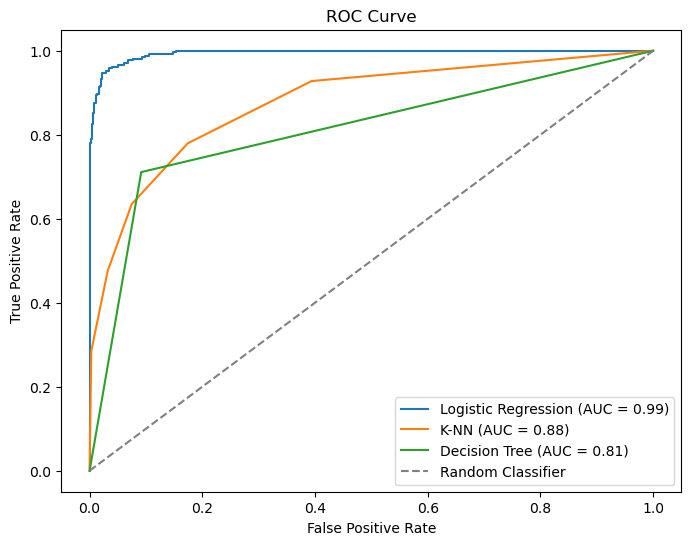

In [65]:
from sklearn.metrics import roc_curve, roc_auc_score , auc
# Compute ROC and AUC for Logistic Regression
log_reg_probs = log_reg.predict_proba(X_test_scaled)[:, 1]
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, log_reg_probs)
auc_log_reg = roc_auc_score(y_test, log_reg_probs)

# Compute ROC and AUC for K-NN
knn_probs = knn.predict_proba(X_test_scaled)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_probs)
auc_knn = roc_auc_score(y_test, knn_probs)

# Compute ROC and AUC for Decision Tree
decision_tree_probs = decision_tree.predict_proba(X_test_scaled)[:, 1]
fpr_decision_tree, tpr_decision_tree, thresholds_decision_tree = roc_curve(y_test, decision_tree_probs)
auc_decision_tree = roc_auc_score(y_test, decision_tree_probs)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {auc_log_reg:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'K-NN (AUC = {auc_knn:.2f})')
plt.plot(fpr_decision_tree, tpr_decision_tree, label=f'Decision Tree (AUC = {auc_decision_tree:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

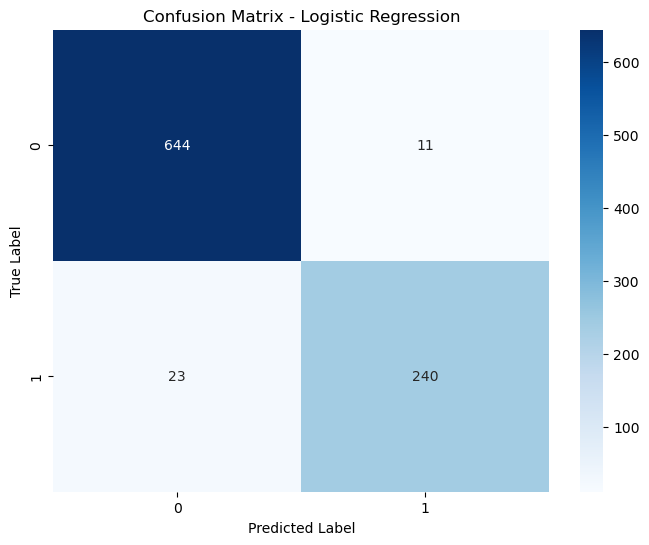

In [66]:
# Draw confusion matrix for Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log_reg, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

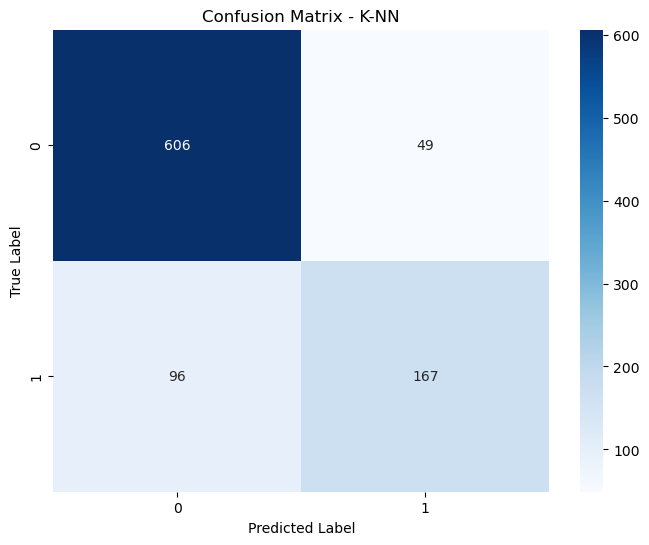

In [67]:
# Draw confusion matrix for K-NN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - K-NN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

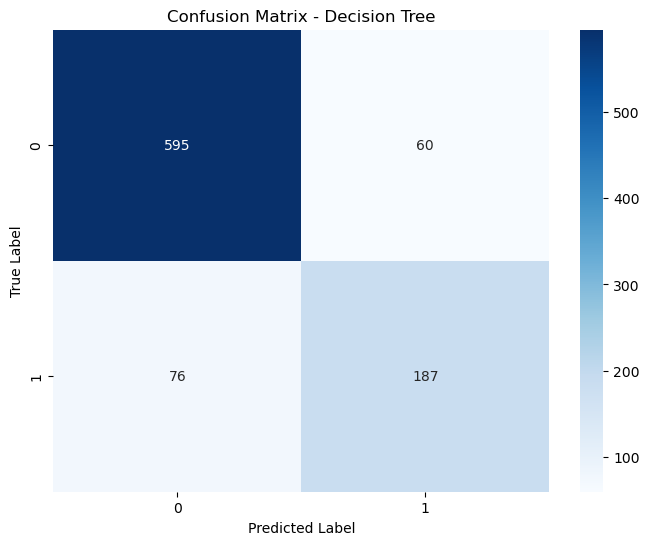

In [68]:
# Draw confusion matrix for Decision Tree
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_decision_tree, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [69]:
# Compute predicted probabilities for all three models
y_pred_prob_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]
y_pred_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]
y_pred_prob_decision_tree = decision_tree.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curves and find optimal cut-off for Logistic Regression
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_pred_prob_log_reg)
optimal_idx_log_reg = np.argmax(tpr_log_reg - fpr_log_reg)
optimal_threshold_log_reg = thresholds_log_reg[optimal_idx_log_reg]

# Compute ROC curves and find optimal cut-off for K-NN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)
optimal_idx_knn = np.argmax(tpr_knn - fpr_knn)
optimal_threshold_knn = thresholds_knn[optimal_idx_knn]

# Compute ROC curves and find optimal cut-off for Decision Tree
fpr_decision_tree, tpr_decision_tree, thresholds_decision_tree = roc_curve(y_test, y_pred_prob_decision_tree)
optimal_idx_decision_tree = np.argmax(tpr_decision_tree - fpr_decision_tree)
optimal_threshold_decision_tree = thresholds_decision_tree[optimal_idx_decision_tree]

# Display the optimal cut-off values for all three models
print("Optimal Cut-off for Logistic Regression:", optimal_threshold_log_reg)
print("Optimal Cut-off for K-NN:", optimal_threshold_knn)
print("Optimal Cut-off for Decision Tree:", optimal_threshold_decision_tree)

Optimal Cut-off for Logistic Regression: 0.25394902996514246
Optimal Cut-off for K-NN: 0.4
Optimal Cut-off for Decision Tree: 1.0


- Additional notes
  - You can peform additional tasks like building ROC/AUC curves for all the models and identifying an optimal cut-off
  - You can also build conjectures around some arbitrary metric cut-offs. For example, say you want to build a model which has atleast 50% accuracy, specificity and sensitivity. Use these conjectures to arrive at a final model
  - Note that there is no right answer for this particular question. You will be awarded marks as long as your overall approach is correct

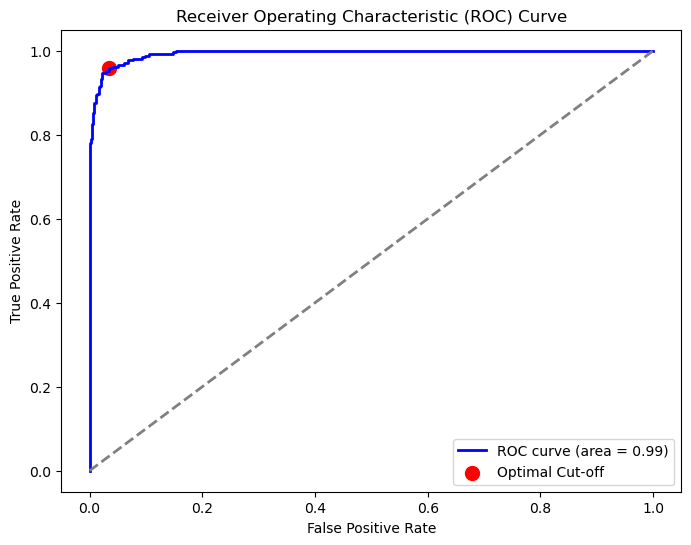

Optimal Cut-off: 0.25394902996514246


In [70]:
# Compute predicted probabilities
y_pred_prob_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_log_reg)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Find optimal cut-off point
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', s=100, label='Optimal Cut-off')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("Optimal Cut-off:", optimal_threshold)

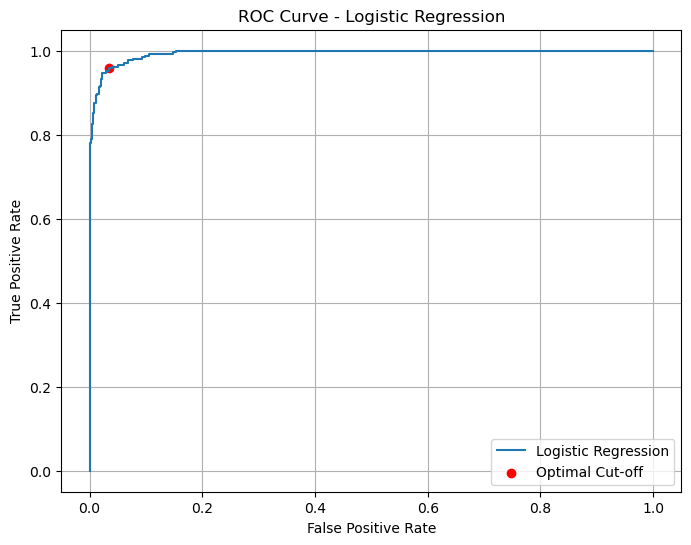

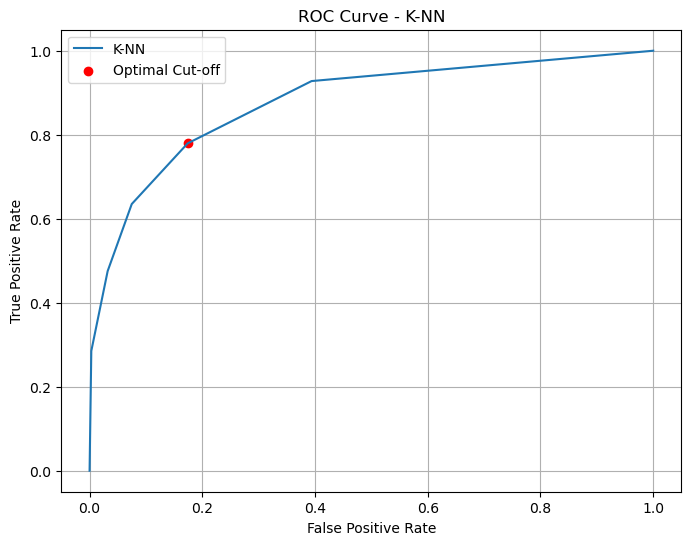

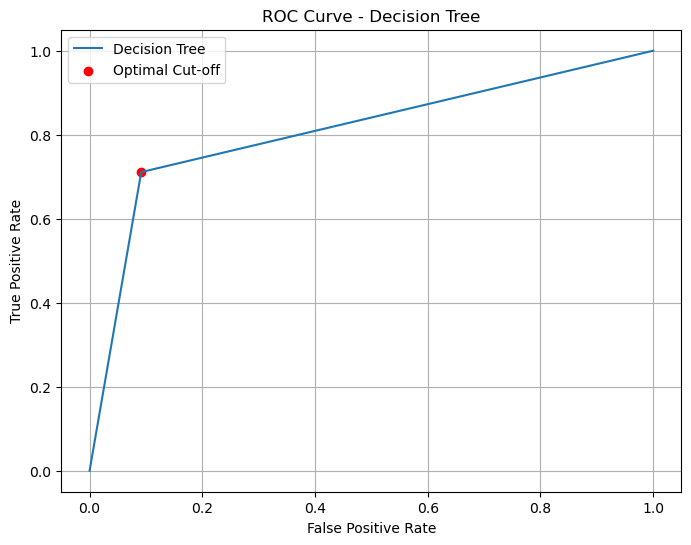

In [71]:
# ROC curve and  optimal cut-off point for Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression')
plt.scatter(fpr_log_reg[optimal_idx_log_reg], tpr_log_reg[optimal_idx_log_reg], color='red', label='Optimal Cut-off')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

# ROC curve and optimal cut-off point for K-NN
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label='K-NN')
plt.scatter(fpr_knn[optimal_idx_knn], tpr_knn[optimal_idx_knn], color='red', label='Optimal Cut-off')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - K-NN')
plt.legend()
plt.grid(True)
plt.show()

# ROC curve and  optimal cut-off point for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(fpr_decision_tree, tpr_decision_tree, label='Decision Tree')
plt.scatter(fpr_decision_tree[optimal_idx_decision_tree], tpr_decision_tree[optimal_idx_decision_tree], color='red', label='Optimal Cut-off')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.grid(True)
plt.show()


### Task 3 

You have now built (at least) three machine learning models. Choose the best model according to your metrics and provide the following recommendations
-  Hospital Rating Predictor: Using the best model of your choice, predict the ratings of a few new hospitals which are yet to be assigned a rating by CMS. The information for these hospitals has been provided in a separate CSV file named 'not_yet_rated.csv'.
- Hospital Improvement Plan: Let's say a few of the hospitals were rated low (0) by the model that you chose. Provide recommendations on how these hospitals can improve their ratings

In [72]:
###Let's read the not_yet_rated dataset
new = pd.read_csv(r"C:\Users\adity\Downloads\DataSets\DataSets\not_yet_rated.csv")

In [73]:
## Check the top 5 rows
new.head(5)

,Provider ID,Hospital Ownership,Emergency Services,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,520139,Voluntary,Yes,1,1,2,2,2,2,1,...,-0.37100,-1.278000,0.000000,-0.56600,-3.100000,-0.500000,-6.100000,-2.900000,-41.000000,-6.100000
1,520189,Government,Yes,2,1,2,2,2,2,1,...,-1.16900,0.000000,-0.987212,-0.83400,-6.700000,-0.300000,-5.400000,-1.900000,-41.100000,-5.300000
2,370029,Government,No,1,1,1,1,1,2,1,...,-0.96398,-0.871177,-0.987212,0.00000,-18.700000,-13.900000,-4.716942,-2.964405,-39.964766,-8.300000
3,370032,Others,Yes,1,2,1,0,1,1,1,...,0.00000,-0.871177,-0.987212,-0.92400,-10.900000,-2.700000,-1.100000,-4.500000,-53.200000,-10.500000
4,370036,Government,Yes,1,1,1,1,0,2,1,...,-0.96398,-0.871177,-0.987212,-0.84197,-8.692897,-2.936245,-4.716942,0.000000,-39.964766,-9.144957


### Approach to predict ratings
- Perform the exact same data preparation steps as earlier
   - Drop the unnecessary columns
   - Convert the datatypes of categorical variables and create dummies
   - Standardize the numeric columns
- After that we shall use the `.predict()` method of your ML model to predict the ratings

In [74]:
# Drop the unnecessary columns
demo_features = ['Provider ID','Hospital Ownership','Emergency Services','rating_group' ]
new_data = new.drop(columns=demo_features)

# Convert categorical variables into dummy variables
new_data = pd.get_dummies(new_data, drop_first=False)

# Getting the  missing dummy columns
missing_columns = set(X_train.columns) - set(new_data.columns)
for col in missing_columns:
    new_data[col] = 0

# Select columns in the same order as X_train
X_new_hospitals = new_data[X_train.columns]

# Standardize numeric columns
scaler = StandardScaler()
numeric_cols = X_new_hospitals.select_dtypes(include=['float64', 'int64']).columns.tolist()
X_new_hospitals[numeric_cols] = scaler.fit_transform(X_new_hospitals[numeric_cols])

predicted_ratings = log_reg.predict(X_new_hospitals)
predicted_ratings

array([1, 1, 0, 0, 0, 0], dtype=int64)

### Approach to identify areas of improvement

- Identify the measures which have a positive influence on the overall hospital ratings. For example,
    - if you're using a logistic regression model, you can check the coefficients
        - A +ve coefficient indicates +ve influence on the overall hospital rating
        - A -ve coefficient indicates -ve influence on the overall hospital rating
- Identify in which of the above measures a low-rated hospital is currently lagging behind. These measures need to be improved.
- Further deep dive into the sub-measures using the same approach as above. 

In [75]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Obtain coefficients
coefficients = pd.DataFrame({'Columns': X.columns, 'Coefficient': logistic_model.coef_[0]})
coefficients
positive_influences = coefficients[coefficients['Coefficient'] > 0]

print("Features with Positive Influence:")
positive_influences.head(10)

Features with Positive Influence:


,Columns,Coefficient
0,Mortality national comparison,0.239754
1,Safety of care national comparison,0.762853
2,Readmission national comparison,0.651633
3,Patient experience national comparison,0.394921
6,Efficient use of medical imaging national comp...,0.016319
7,MORT_30_AMI_Score,0.219923
8,MORT_30_CABG_Score,0.084944
9,MORT_30_COPD_Score,0.444516
10,MORT_30_HF_Score,0.801751
11,MORT_30_PN_Score,0.721548


In [76]:
negative_influences = coefficients[coefficients['Coefficient'] < 0]
negative_influences

,Columns,Coefficient
4,Effectiveness of care national comparison,-0.066117
5,Timeliness of care national comparison,-0.042778
13,READM_30_AMI_Score,-0.201334
14,READM_30_CABG_Score,-0.111051
15,READM_30_COPD_Score,-0.368731
16,READM_30_HF_Score,-0.425782
17,READM_30_HIP_KNEE_Score,-0.135707
18,READM_30_HOSP_WIDE_Score,-0.886879
19,READM_30_PN_Score,-0.453870
20,READM_30_STK_Score,-0.232431


In [77]:
# Reset indices for y_val and coefficients
y_val_reset = y_val.reset_index(drop=True)
coefficients_reset = coefficients.reset_index(drop=True)

# Identify low-rated hospitals
low_rated_indices = y_val_reset[y_val_reset == 1].index

# Create a  filter coefficients for low-rated hospitals
low_rated_mask = coefficients_reset.index.isin(low_rated_indices)

# Extract coefficients for low-rated hospitals
low_rated_coefficients = coefficients_reset[low_rated_mask]

# Display coefficients for low-rated hospitals
if not low_rated_coefficients.empty:
    print("Coefficients for Low-Rated Hospitals:")
    print(low_rated_coefficients)
else:
    print("No low-rated hospitals found in the validation set.")

Coefficients for Low-Rated Hospitals:
                                      Columns  Coefficient
1          Safety of care national comparison     0.762853
3      Patient experience national comparison     0.394921
4   Effectiveness of care national comparison    -0.066117
12                          MORT_30_STK_Score     0.342935
19                          READM_30_PN_Score    -0.453870
20                         READM_30_STK_Score    -0.232431
34                            EFF_PC_01_Score     0.068764
36                           EFF_STK_10_Score     0.125041
45                            EFF_VTE_6_Score     0.026081
50             EXP_H_COMP_4_STAR_RATING_Score     0.376550
51             EXP_H_COMP_5_STAR_RATING_Score     0.427100
57                    EXP_H_STAR_RATING_Score     0.409559
63                   SAFETY_PSI_3_ULCER_Score     0.092444
69                    SAFETY_HAI_1a_SIR_Score     0.068439
75                     SAFETY_HAI_6_SIR_Score     0.049824
78                

In [78]:
# Identify the top N features with highest coefficients
top_n_features = coefficients.sort_values(by='Coefficient', ascending=False).head(10)['Columns']

# Extract coefficients for these top features
sub_measures_coefficients = coefficients[coefficients['Columns'].isin(top_n_features)]

# Display coefficients for the top N features
print(f"Coefficients for the top {10} features:")
sub_measures_coefficients

Coefficients for the top 10 features:


,Columns,Coefficient
1,Safety of care national comparison,0.762853
2,Readmission national comparison,0.651633
10,MORT_30_HF_Score,0.801751
11,MORT_30_PN_Score,0.721548
46,EXP_H_CLEAN_STAR_RATING_Score,0.445801
47,EXP_H_COMP_1_STAR_RATING_Score,0.486712
53,EXP_H_COMP_7_STAR_RATING_Score,0.513867
56,EXP_H_RECMND_STAR_RATING_Score,0.514260
59,SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score,1.040021
62,SAFETY_PSI_15_ACC_LAC_Score,0.513107
